# Laptop Price Prediction
#### In this notebook, we will go through the process of predicting laptop prices using a dataset. We'll start by importing necessary libraries, followed by data preprocessing, exploratory data analysis, feature engineering, model training, and evaluation.

`Author:` [Syed Muhammad Ebad](https://www.kaggle.com/syedmuhammadebad)\
`Date:` 12-June-2024\
[Send me an email](mailto:mohammadebad1@hotmail.com)\
[Visit my GitHub profile](https://github.com/smebad)

## Import Libraries

In [157]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')


In [158]:
# Load and display the dataset
df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## Initial Data Exploration

In [159]:
# Displaying value counts for some columns
df.Product.value_counts()

Product
XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Legion Y520-15IKBN                         19
Vostro 3568                                19
                                           ..
15-bw007nv (A10-9620P/6GB/128GB/Radeon      1
SmartBook 130                               1
A541NA-GO342 (N3350/4GB/500GB/Linux)        1
17-X047na (i3-6006U/8GB/1TB/W10)            1
V330-15IKB (i5-8250U/4GB/500GB/FHD/W10)     1
Name: count, Length: 618, dtype: int64

In [160]:
df.Company.value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [161]:
df.TypeName.value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [162]:
df.Ram.value_counts()

Ram
8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: count, dtype: int64

## Data Preprocessing

In [163]:
# Dropping 'Product' column
df = df.drop("Product", axis=1)
df.head()

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [164]:
# One-hot encoding 'Company' column
df = df.join(pd.get_dummies(df.Company).astype(int))
df = df.drop("Company", axis=1)

In [165]:
# One-hot encoding 'TypeName' column
df = df.join(pd.get_dummies(df.TypeName).astype(int))
df = df.drop("TypeName", axis=1)
df.head()

,laptop_ID,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,1,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,...,0,0,0,0,0,0,0,0,1,0
1,2,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,...,0,0,0,0,0,0,0,0,1,0
2,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,...,0,0,0,0,0,0,0,1,0,0
3,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,...,0,0,0,0,0,0,0,0,1,0
4,5,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,...,0,0,0,0,0,0,0,0,1,0


In [166]:
# Splitting 'ScreenResolution' into width and height
df["ScreenResolution"] = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])
df["Screen Width"] = df.ScreenResolution.str.split("x").apply(lambda x: x[0])
df["Screen Height"] = df.ScreenResolution.str.split("x").apply(lambda x: x[1])
df.head()

,laptop_ID,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height
0,1,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,...,0,0,0,0,0,0,1,0,2560,1600
1,2,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,...,0,0,0,0,0,0,1,0,1440,900
2,3,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,...,0,0,0,0,0,1,0,0,1920,1080
3,4,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,...,0,0,0,0,0,0,1,0,2880,1800
4,5,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,...,0,0,0,0,0,0,1,0,2560,1600


In [167]:
# Dropping 'ScreenResolution' column
df = df.drop("ScreenResolution", axis=1)

In [168]:
# Extracting 'CPU Brand Name' and 'CPU Frequency' from 'Cpu' column
df["CPU Brand Name"] = df.Cpu.str.split(" ").apply(lambda x: x[0])
df["CPU Frequency"] = df.Cpu.str.split(" ").apply(lambda x: x[-1])
df.head()


,laptop_ID,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,CPU Brand Name,CPU Frequency
0,1,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,...,0,0,0,0,1,0,2560,1600,Intel,2.3GHz
1,2,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,...,0,0,0,0,1,0,1440,900,Intel,1.8GHz
2,3,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,...,0,0,0,1,0,0,1920,1080,Intel,2.5GHz
3,4,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,...,0,0,0,0,1,0,2880,1800,Intel,2.7GHz
4,5,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,...,0,0,0,0,1,0,2560,1600,Intel,3.1GHz


In [169]:
# Dropping 'Cpu' column
df = df.drop("Cpu", axis=1)

In [170]:
# Cleaning 'CPU Frequency' column
df["CPU Frequency"] = df["CPU Frequency"].str[:3]
df.head()

,laptop_ID,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,CPU Brand Name,CPU Frequency
0,1,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,...,0,0,0,0,1,0,2560,1600,Intel,2.3
1,2,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,1,...,0,0,0,0,1,0,1440,900,Intel,1.8
2,3,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,...,0,0,0,1,0,0,1920,1080,Intel,2.5
3,4,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,...,0,0,0,0,1,0,2880,1800,Intel,2.7
4,5,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,...,0,0,0,0,1,0,2560,1600,Intel,3.1


In [171]:
# Cleaning 'Ram' column
df["Ram"] = df["Ram"].str[:2]
df.head()

,laptop_ID,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,CPU Brand Name,CPU Frequency
0,1,13.3,8G,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,...,0,0,0,0,1,0,2560,1600,Intel,2.3
1,2,13.3,8G,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,1,...,0,0,0,0,1,0,1440,900,Intel,1.8
2,3,15.6,8G,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,...,0,0,0,1,0,0,1920,1080,Intel,2.5
3,4,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,...,0,0,0,0,1,0,2880,1800,Intel,2.7
4,5,13.3,8G,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,...,0,0,0,0,1,0,2560,1600,Intel,3.1


In [172]:
# Ensuring that all the values in 'Ram' column are treated as strings
df['Ram'] = df['Ram'].astype(str)

In [173]:
# Remove non-numeric characters from the 'Ram' column and convert to integer
df['Ram'] = df['Ram'].str.extract('(\d+)').astype(int)

In [174]:
# Ensuring that all values in 'CPU Frequency' column are treated as strings
df['CPU Frequency'] = df['CPU Frequency'].astype(str)

In [175]:
# Remove non-numeric characters from the 'CPU Frequency' column and convert to float
df['CPU Frequency'] = df['CPU Frequency'].str.extract('(\d+\.?\d*)').astype(float)
df.head()

,laptop_ID,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,CPU Brand Name,CPU Frequency
0,1,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,...,0,0,0,0,1,0,2560,1600,Intel,2.3
1,2,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,1,...,0,0,0,0,1,0,1440,900,Intel,1.8
2,3,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,...,0,0,0,1,0,0,1920,1080,Intel,2.5
3,4,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,...,0,0,0,0,1,0,2880,1800,Intel,2.7
4,5,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,...,0,0,0,0,1,0,2560,1600,Intel,3.1


In [176]:
# Convert 'Screen Width' and 'Screen Height' to integer
df["Screen Width"] = df["Screen Width"].astype(int)
df["Screen Height"] = df["Screen Height"].astype(int)
df.head()

,laptop_ID,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,CPU Brand Name,CPU Frequency
0,1,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,...,0,0,0,0,1,0,2560,1600,Intel,2.3
1,2,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,1,...,0,0,0,0,1,0,1440,900,Intel,1.8
2,3,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,...,0,0,0,1,0,0,1920,1080,Intel,2.5
3,4,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,...,0,0,0,0,1,0,2880,1800,Intel,2.7
4,5,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,...,0,0,0,0,1,0,2560,1600,Intel,3.1


In [177]:
# Splitting 'Memory' into amount and type
df["Memmory Amount"] = df.Memory.str.split(" ").apply(lambda x: x[0])
df["Memmory Type"] = df.Memory.str.split(" ").apply(lambda x: x[1])
df['Memmory Amount'].value_counts()

Memmory Amount
256GB    508
1TB      240
128GB    177
512GB    140
500GB    132
32GB      45
64GB      17
2TB       16
1.0TB     10
16GB      10
180GB      5
240GB      1
8GB        1
508GB      1
Name: count, dtype: int64

In [178]:
# Function to convert memory amounts to MB
def memory_into_MB(value):
    if "GB" in value:
        return float(value[:value.find("GB")]) * 1000
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1000000

In [179]:
# Apply function to 'Memmory Amount' column
df["Memmory Amount"] = df["Memmory Amount"].apply(memory_into_MB)
df = df.drop("Memory", axis=1)
df.head()

,laptop_ID,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Acer,Apple,Asus,...,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,CPU Brand Name,CPU Frequency,Memmory Amount,Memmory Type
0,1,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,0,...,0,0,1,0,2560,1600,Intel,2.3,128000.0,SSD
1,2,13.3,8,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,1,0,...,0,0,1,0,1440,900,Intel,1.8,128000.0,Flash
2,3,15.6,8,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,0,...,0,1,0,0,1920,1080,Intel,2.5,256000.0,SSD
3,4,15.4,16,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,0,...,0,0,1,0,2880,1800,Intel,2.7,512000.0,SSD
4,5,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,0,...,0,0,1,0,2560,1600,Intel,3.1,256000.0,SSD


In [180]:
# Cleaning 'Weight' column
df['Weight'] = df['Weight'].str[:-2]
df['Weight'] = df['Weight'].astype(float)
df.head()

,laptop_ID,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Acer,Apple,Asus,...,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,CPU Brand Name,CPU Frequency,Memmory Amount,Memmory Type
0,1,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,0,...,0,0,1,0,2560,1600,Intel,2.3,128000.0,SSD
1,2,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,1,0,...,0,0,1,0,1440,900,Intel,1.8,128000.0,Flash
2,3,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,0,...,0,1,0,0,1920,1080,Intel,2.5,256000.0,SSD
3,4,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,0,...,0,0,1,0,2880,1800,Intel,2.7,512000.0,SSD
4,5,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,0,...,0,0,1,0,2560,1600,Intel,3.1,256000.0,SSD


In [181]:
# Extracting 'GPU Brand' from 'Gpu' column
df["GPU Brand"] = df.Gpu.str.split(" ").apply(lambda x: x[0])
df = df.drop("Gpu", axis=1)

In [182]:
# One-hot encoding 'OpSys' column
df = df.join(pd.get_dummies(df.OpSys).astype(int))
df = df.drop("OpSys", axis=1)

In [183]:
# One-hot encoding 'CPU Brand Name' column
cpu_ctg = pd.get_dummies(df['CPU Brand Name'])
cpu_ctg.columns = [col + '_CPU' for col in cpu_ctg.columns]
cpu_ctg = cpu_ctg.astype(int)
df = df.join(cpu_ctg)
df = df.drop("CPU Brand Name", axis=1)

In [184]:
# One-hot encoding 'GPU Brand' column
gpu_ctg = pd.get_dummies(df['GPU Brand'])
gpu_ctg.columns = [col + '_GPU' for col in gpu_ctg.columns]
gpu_ctg = gpu_ctg.astype(int)
df = df.join(gpu_ctg)
df = df.drop("GPU Brand", axis=1)


In [185]:
# Dropping 'Memmory Type' column
df = df.drop('Memmory Type', axis=1)
df.head()

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Windows 10 S,Windows 7,macOS,AMD_CPU,Intel_CPU,Samsung_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU
0,1,13.3,8,1.37,1339.69,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,2,13.3,8,1.34,898.94,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,3,15.6,8,1.86,575.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,4,15.4,16,1.83,2537.45,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,5,13.3,8,1.37,1803.60,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


## Exploratory Data Analysis

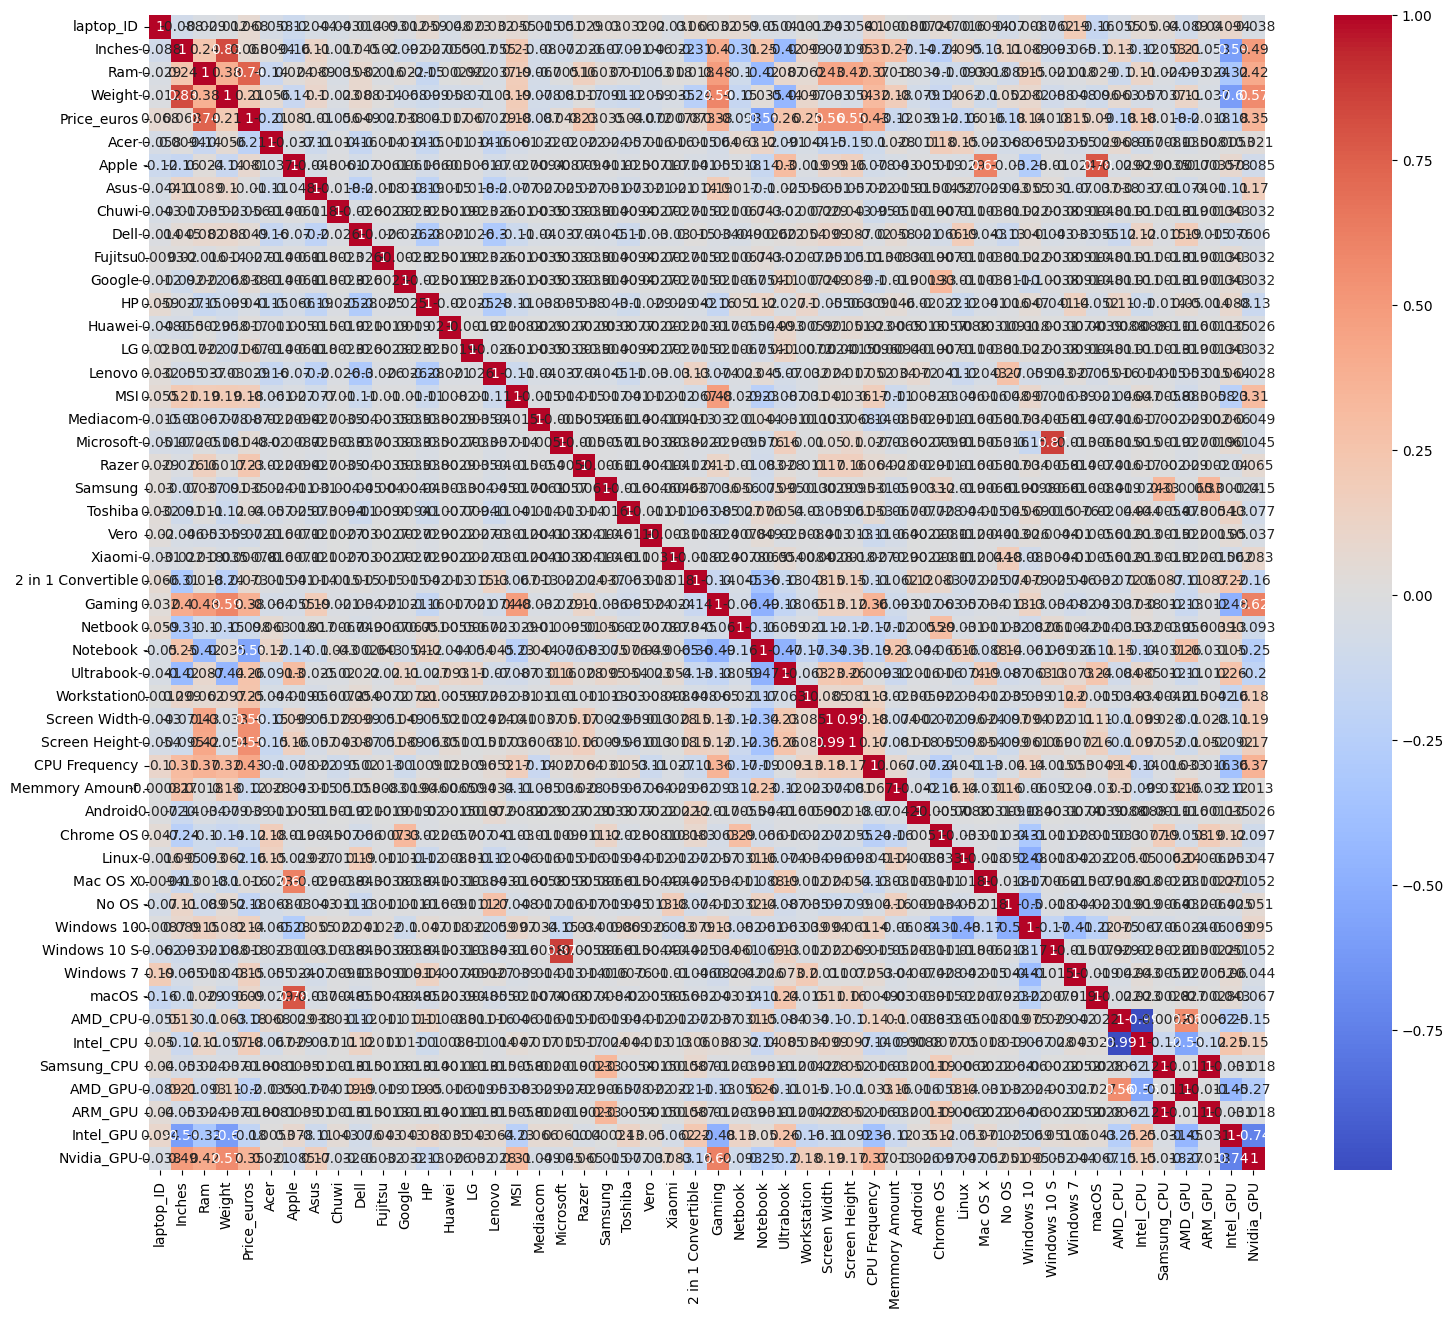

In [186]:
# Heatmap of correlation matrix
plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

## Feature Selection

In [187]:
# Selecting top 20 features based on correlation with target
target_cor = df.corr()['Price_euros'].apply(abs).sort_values()
selected_features = target_cor[-21:].index
selected_features = list(selected_features)
ltd_df = df[selected_features]
ltd_df.head()

,Windows 7,Linux,No OS,MSI,AMD_CPU,Intel_CPU,Intel_GPU,AMD_GPU,Acer,Weight,...,Workstation,Ultrabook,Nvidia_GPU,Gaming,CPU Frequency,Notebook,Screen Height,Screen Width,Ram,Price_euros
0,0,0,0,0,0,1,1,0,0,1.37,...,0,1,0,0,2.3,0,1600,2560,8,1339.69
1,0,0,0,0,0,1,1,0,0,1.34,...,0,1,0,0,1.8,0,900,1440,8,898.94
2,0,0,1,0,0,1,1,0,0,1.86,...,0,0,0,0,2.5,1,1080,1920,8,575.00
3,0,0,0,0,0,1,0,1,0,1.83,...,0,1,0,0,2.7,0,1800,2880,16,2537.45
4,0,0,0,0,0,1,1,0,0,1.37,...,0,1,0,0,3.1,0,1600,2560,8,1803.60


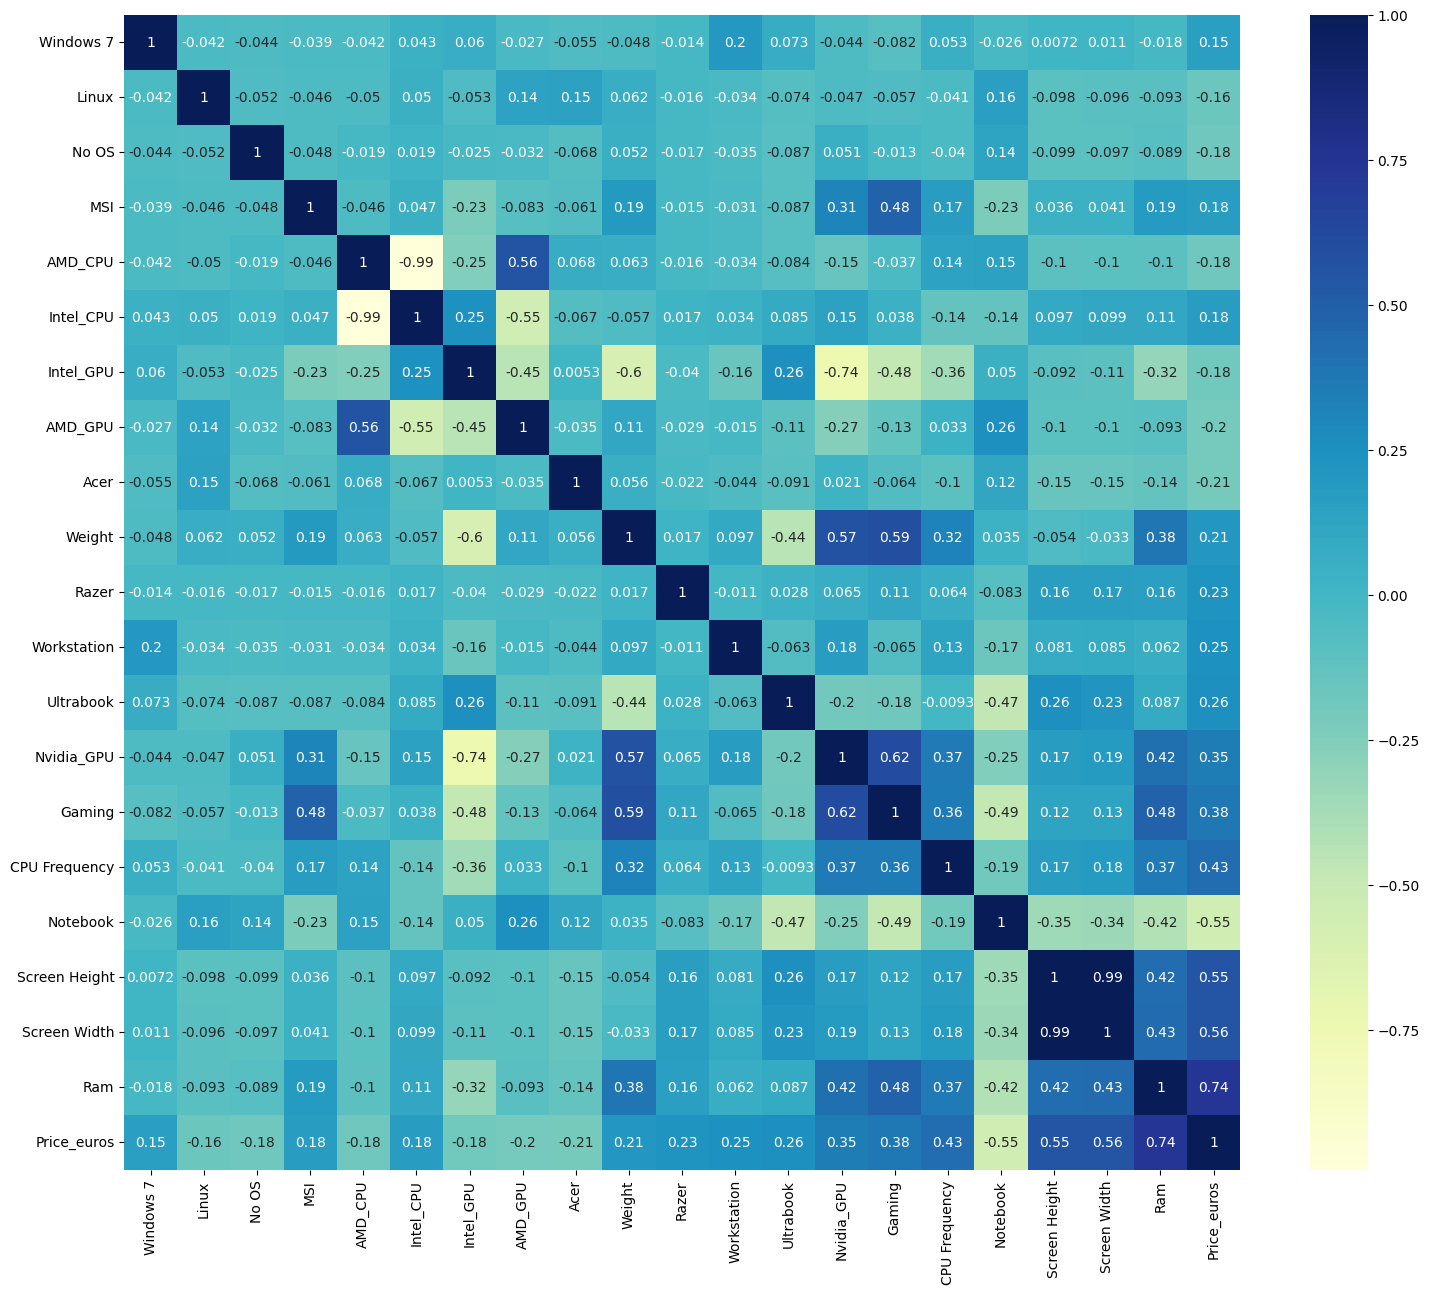

In [188]:
# Heatmap of selected features
plt.figure(figsize=(18, 15))
sns.heatmap(ltd_df.corr(), annot=True, cmap='YlGnBu')
plt.show()

## Model Training and Evaluation

In [189]:
# Splitting data into features and target
X, y = ltd_df.drop('Price_euros', axis=1), ltd_df['Price_euros']

In [214]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [215]:
# Standardizing features
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

In [216]:
# Training Random Forest Regressor
rfr = RandomForestRegressor()
rfr.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [217]:
# Evaluating model
print(f"Model Score: {rfr.score(X_test_scaled, y_test)}")

Model Score: 0.8387337213395689


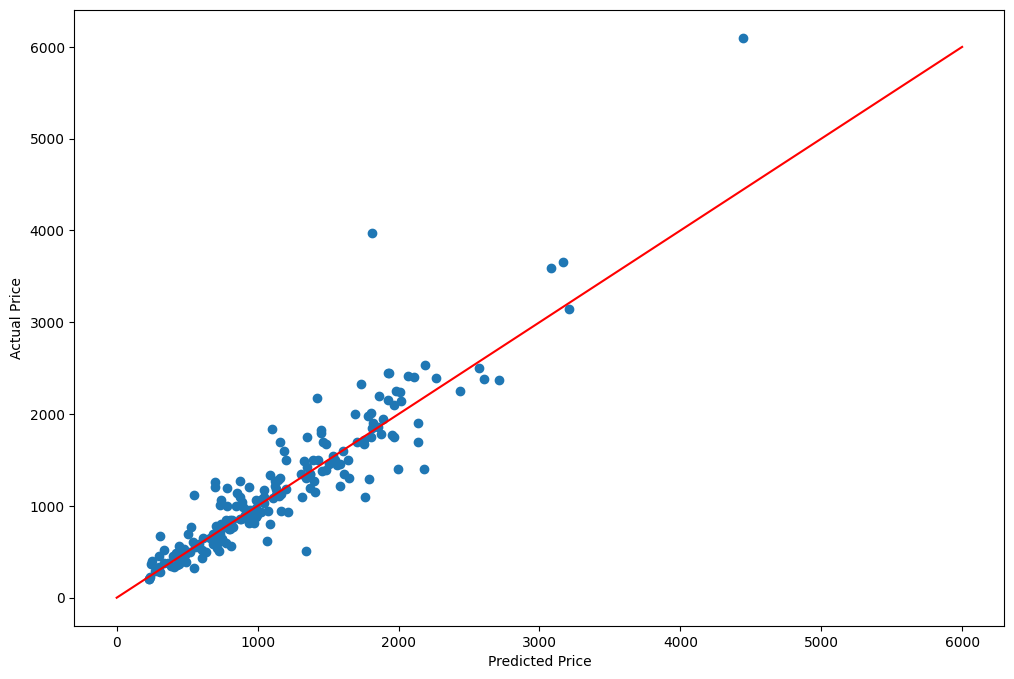

In [218]:
# Plotting predictions
y_pred = rfr.predict(X_test_scaled)
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, y_test)
plt.plot(range(0, 6000), range(0, 6000), color='red')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.show()

In [219]:
# Predicting price for a new sample
X_new_scaled = std_scaler.transform([X_test.iloc[0]])
predicted_price = rfr.predict(X_new_scaled)
actual_price = y_test.iloc[0]

print(f"Predicted Price: {predicted_price[0]}")
print(f"Actual Price: {actual_price}")

Predicted Price: 941.7276000000006
Actual Price: 819.0


### Conclusion

In this notebook, we successfully predicted laptop prices using a Random Forest Regressor. After preprocessing and feature engineering, we performed hyperparameter tuning to optimize the model. Our model achieved a decent score, and we also visualized feature importance to understand which features contribute the most to price prediction. Future improvements could include trying different models and more extensive hyperparameter tuning.

By incorporating these suggestions, your notebook will not only be more robust but also more informative and valuable for the Kaggle community. Once you’ve implemented these changes, it should be ready to post on Kaggle.